In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [46]:
def ProjectiveTransform(source,target,n):
    
    source = np.concatenate((source,np.ones((1,n))))
    target = np.concatenate((target,np.ones((1,n))))
    
    x = target[0,:]
    y = target[1,:]
    X = source[0,:]
    Y = source[1,:]
    
    rows0 = np.zeros((3,n))

    rowsXY = -np.ones((3,n))
    rowsXY[0,:] = -X
    rowsXY[1,:] = -Y

    hx = np.zeros((9,n))
    hx[0:3,:] = rowsXY
    hx[6,:] = np.multiply(x,X)
    hx[7,:] = np.multiply(x,Y)
    hx[8,:] = x

    hy = np.zeros((9,n))
    hy[3:6,:] = rowsXY
    hy[6,:] = np.multiply(y,X)
    hy[7,:] = np.multiply(y,Y)
    hy[8,:] = y

    h = np.concatenate((hx,hy),axis=1)
    
    u, s, vh = np.linalg.svd(h)
    v = np.reshape(u[:,8],(3,3))
    
    q = np.dot(v,source)
    p = q[2,:];
    xx = np.divide(q[0,:],p)
    yy = np.divide(q[1,:],p)
    
    y = np.zeros((2,n))
    y[0,:] = xx
    y[1,:] = yy
    
    return y    

In [47]:
# Data

# Number of points
n = 10

# source
source = np.random.randn(2,n)

#target
target = np.random.randn(2,n)
#M = np.array([[3,1],[1,3]])
#t = 10*np.ones((2,1))
#target = np.dot(M,source)+t

# Simple case
# rectangle (source)
#source = np.array([[0,2,0,2],[0,0,1,1]])
# trapezoid (target)
#target = np.array([[0,2,0,2],[0,0,1,2]])

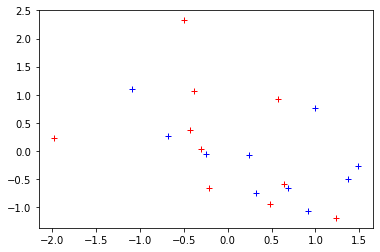

In [48]:
plt.plot(source[0,:],source[1,:],'r+')
plt.plot(target[0,:],target[1,:],'b+')
plt.show()

In [49]:
# translate points to their centroids
centroid_source = np.mean(source, axis=1)
centroid_target = np.mean(target, axis=1)

source_centered = source - np.vstack(centroid_source)
target_centered = target - np.vstack(centroid_target)

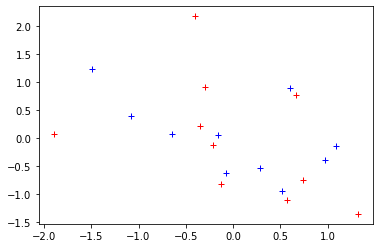

In [50]:
plt.plot(source_centered[0,:],source_centered[1,:],'r+')
plt.plot(target_centered[0,:],target_centered[1,:],'b+')
plt.show()

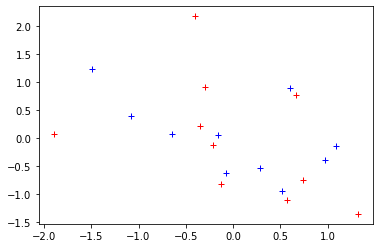

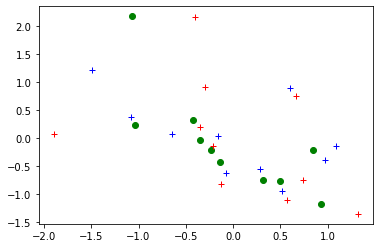

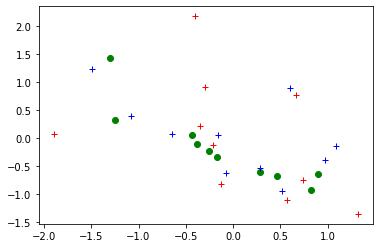

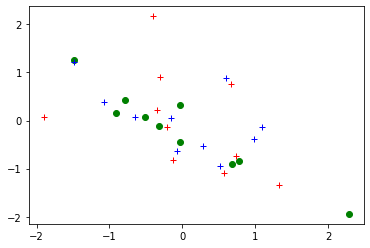

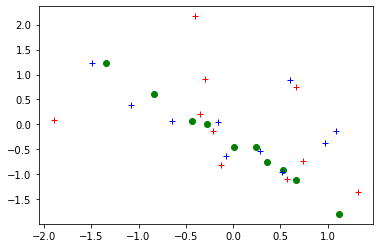

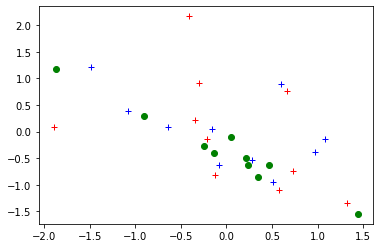

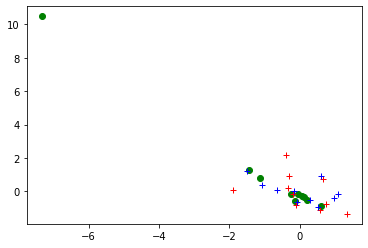

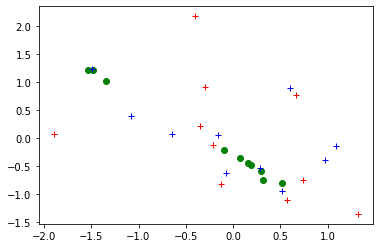

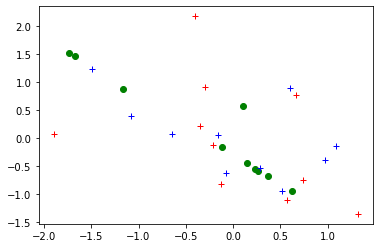

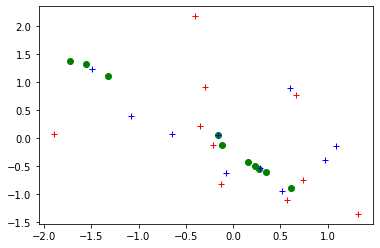

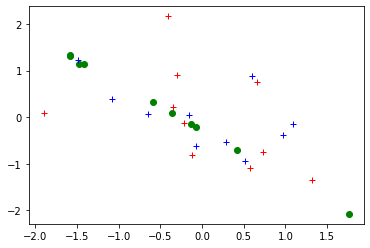

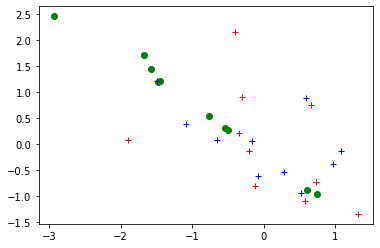

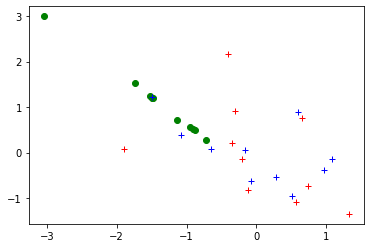

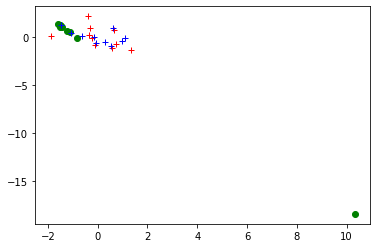

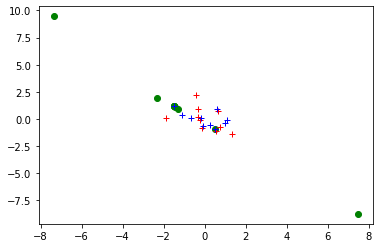

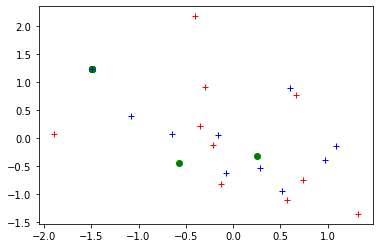

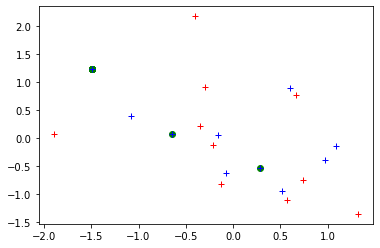

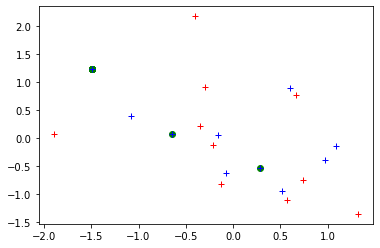

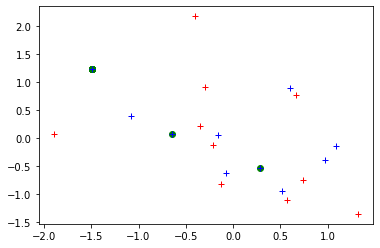

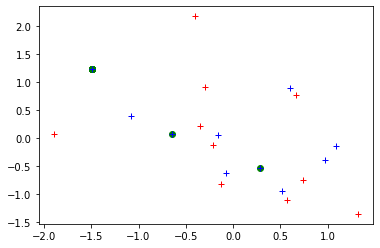

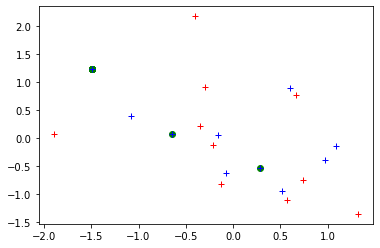

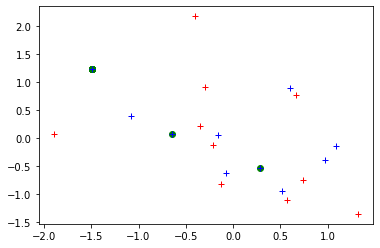

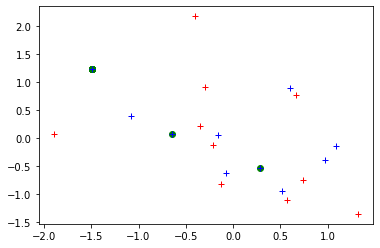

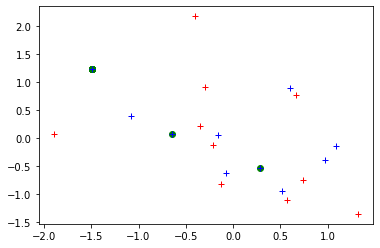

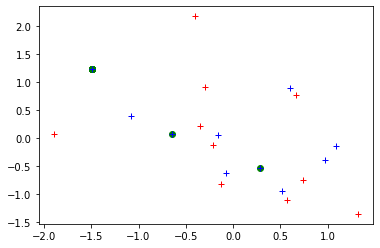

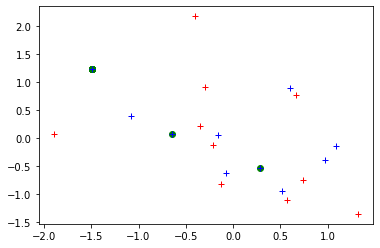

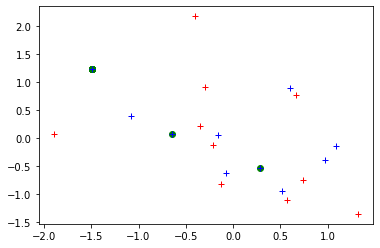

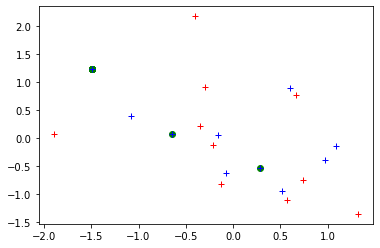

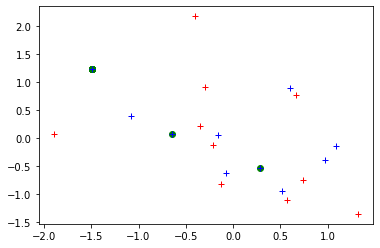

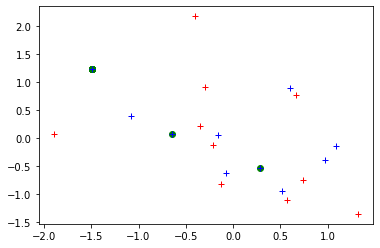

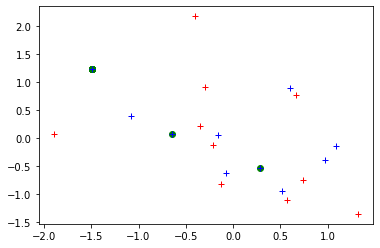

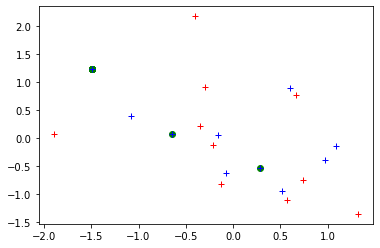

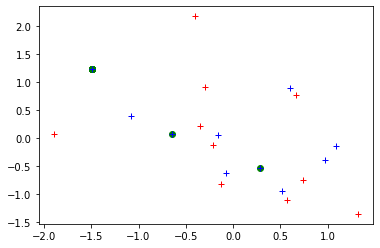

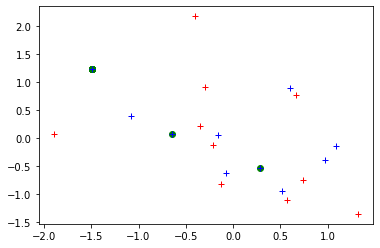

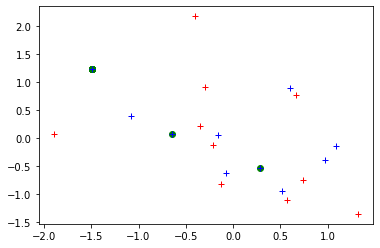

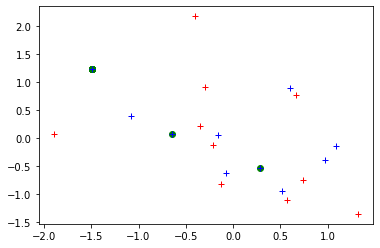

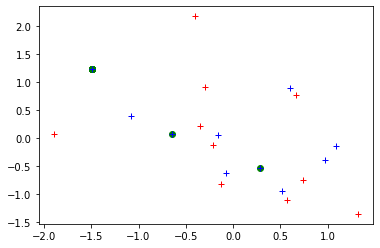

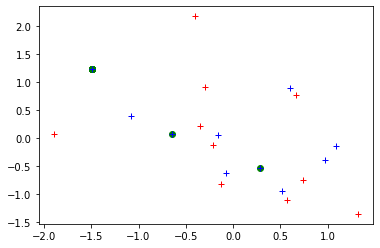

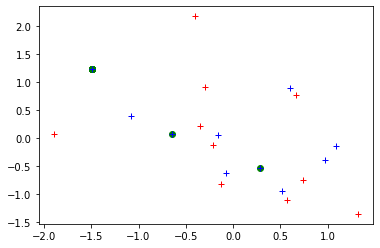

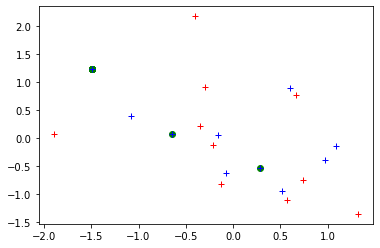

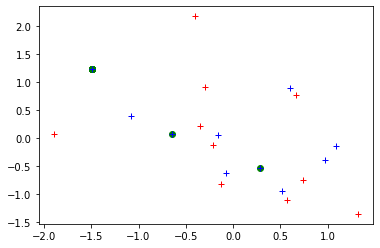

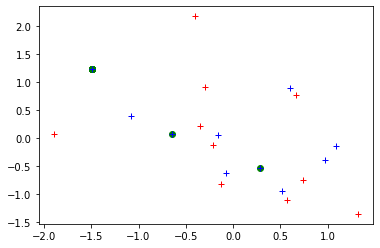

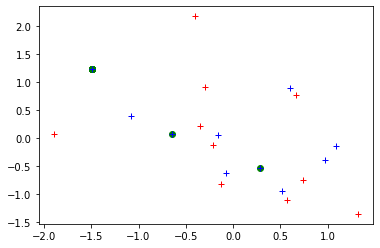

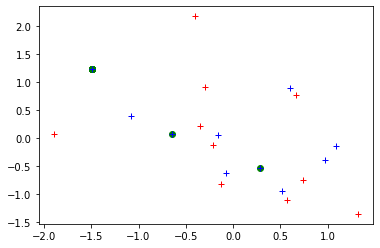

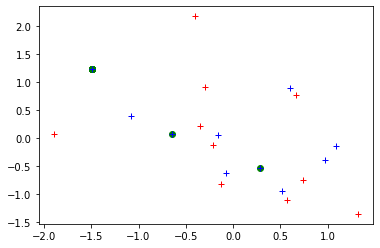

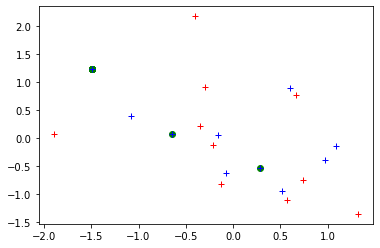

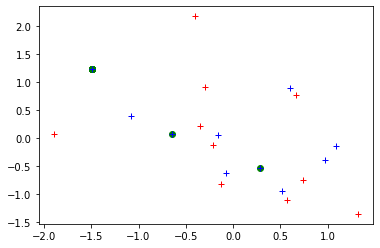

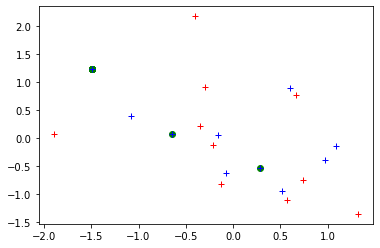

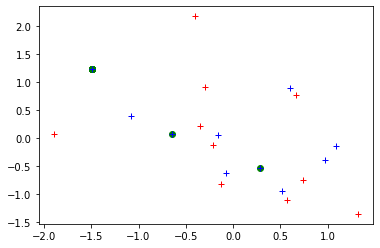

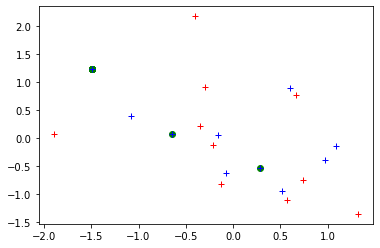

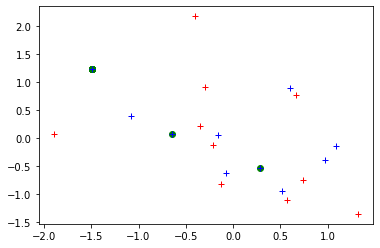

In [51]:
max_iterations = 50

# display
plt.plot(source_centered[0,:],source_centered[1,:],'r+')
plt.plot(target_centered[0,:],target_centered[1,:],'b+')
plt.show()

src = source_centered

# ICP loop
for i in range(max_iterations):
    
    # find the nearest neighbors
    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(target_centered.T)
    distances, indices = neigh.kneighbors(src.T, return_distance=True)
    #print(distances.ravel(),indices.ravel())

    # compute & apply the projective transform that best fits
    y = ProjectiveTransform(src,target_centered[:,indices][:,:,0],n)
    
    # display
    plt.plot(y[0,:],y[1,:],'go')
    plt.plot(source_centered[0,:],source_centered[1,:],'r+')
    plt.plot(target_centered[0,:],target_centered[1,:],'b+')
    plt.show()
    
    src = y    
    

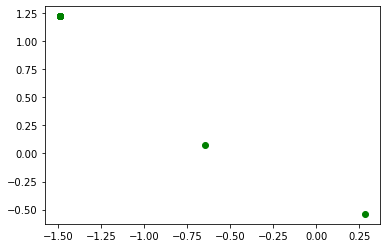

[[-1.48929813 -1.48929813 -1.48929813 -1.48929813 -1.48929813 -1.48929813
  -1.48929813 -1.48929813  0.28099087 -0.64572976]
 [ 1.22171192  1.22171192  1.22171192  1.22171192  1.22171192  1.22171192
   1.22171192  1.22171192 -0.53861636  0.07827018]]


In [52]:
plt.plot(y[0,:],y[1,:],'go')
plt.show()

print(y)